In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
# Parameters setup
Du = 0.5
Dv = 0.5
f = 0.055
k = 0.062

# Grid setup
m, n = 32, 32
h = 1

# Time steps
dt = 0.05
end_t = 100
time_steps = int(end_t/dt)
print(time_steps)

c = dt/(h*h)

10000


In [79]:
# Function to plot the contour of the 2D pattern of U[tu] and V[tv]
def plot_pattern(U, V, tu, tv, filled=True):
    # 2D meshgrid setup
    x = np.linspace(0, n*h, n)
    y = np.linspace(0, m*h, m)
    X, Y = np.meshgrid(x, y)
    # Countour plot
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    if not filled and tu!=0 and tv!=0:
        axes[0].contour(X, Y, U[tu], cmap=plt.cm.coolwarm)
        axes[1].contour(X, Y, V[tv], cmap=plt.cm.coolwarm)
    else:
        axes[0].contourf(X, Y, U[tu], cmap=plt.cm.coolwarm)
        axes[1].contourf(X, Y, V[tv], cmap=plt.cm.coolwarm)
    axes[0].set_title('U at time = %.2f sec' % (tu*dt), fontsize=16)
    axes[1].set_title('V at time = %.2f sec' % (tv*dt), fontsize=16)
    plt.show()

In [80]:
# Initial condition
U = np.zeros((time_steps, m, n))
V = np.zeros((time_steps, m, n))
U[0][:, :] = 1
V[0][10, 13:16] = 1
V[0][14:20, 20] = 1

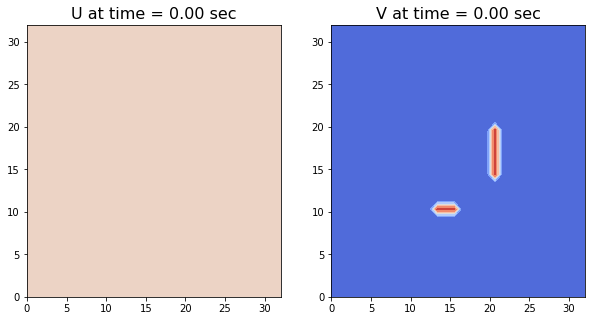

In [81]:
plot_pattern(U, V, 0, 0, filled=False)

In [82]:
for i in range(1, time_steps):
    for j in range(m):
        for k in range(n):
            s1 = -4*U[i-1][j, k]
            s2 = -4*V[i-1][j, k]
            orth_neighbors = np.array([(j-1, k), (j+1, k), (j, k-1), (j, k+1)])
            for jn, kn in orth_neighbors:
                if jn < 0: 
                    jn += m
                if jn >= m: 
                    jn -= m
                if kn < 0:
                    kn += n
                if kn >= n:
                    kn -= n
                s1 += U[i-1][jn, kn]
                s2 += V[i-1][jn, kn]
            
            s1 *= Du*c
            s2 *= Dv*c
            
            s1 -= dt*U[i-1][j, k]*(V[i-1][j ,k]**2)
            s2 += dt*U[i-1][j, k]*(V[i-1][j ,k]**2)
            
            s1 += dt*f*(1-U[i-1][j, k]) + U[i-1][j, k]
            s2 += -dt*(k+f)*V[i-1][j, k] + V[i-1][j, k]
            
            U[i][j, k] = s1
            V[i][j, k] = s2


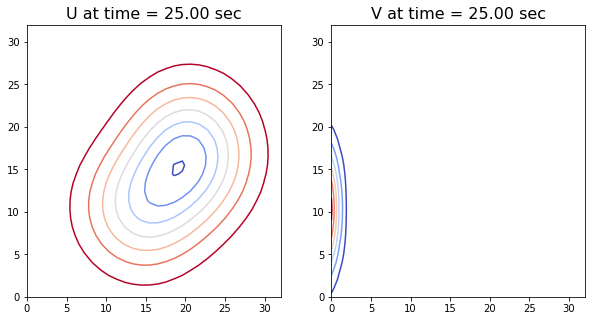

In [85]:
plot_pattern(U, V, 5000, 5000, filled=False)

In [57]:
V[100]

array([[  3.83069138e+067,  -1.22025171e+012,  -1.14475221e-006, ...,
         -1.22021929e+012,   3.83069144e+067,  -1.23301803e+232],
       [ -1.10971739e+233,   1.72381226e+068,  -3.66068099e+012, ...,
          1.72381232e+068,  -1.10971739e+233,               nan],
       [              nan,  -4.43887304e+233,   4.59683478e+068, ...,
         -4.43887305e+233,               nan,               nan],
       ..., 
       [  9.81124139e-006,  -7.88746256e-008,   6.44520889e-010, ...,
         -9.50091589e-005,   4.80620463e-004,  -1.23996650e-003],
       [ -1.31986576e-004,   1.06155398e-006,  -8.66986986e-009, ...,
          1.28953447e-003,  -6.49366785e-003,  -2.21872786e+010],
       [ -2.44055231e+011,  -1.30176556e-005,   1.06821516e-007, ...,
         -1.59858479e-002,  -2.44048910e+011,   3.83068804e+066]])